In [ ]:
# Import libraries

import pandas as pd 
import numpy as np
!pip install missingno
import missingno as msno
!pip install plotly
import plotly.express as px
from scipy.stats import skew, norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

# Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 
3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [ ]:
# put your code for Q1 here, you can have multiple code blocks.
df = pd.read_csv("/content/20to22NYC.csv")

# print the first five rows from the data
df.head()

<ipython-input-35-3f37bd5abbf5>:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/20to22NYC.csv")


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,NaN,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,NaN,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,NaN,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,NaN,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,NaN,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


In [ ]:
# print some information about the data to check the datatype for each colmns
df.info()

# print the dimension of the data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

(258464, 20)

In [ ]:
# illustrate some statistics about the data
df.describe(include="all")

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,258464.000000,258464,258464,258143,258464.000000,258464.000000,258143,258464,62945,258445.000000,199349.0,162951.0,205304.0,1.569960e+05,1.569960e+05,240618.000000,258464.000000,258464,2.584640e+05,258464
unique,NaN,255,44,10,NaN,NaN,174,241541,9040,NaN,446.0,116.0,475.0,NaN,NaN,NaN,NaN,173,NaN,1096
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,55 AUSTIN PLACE,3A,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,R4,NaN,2022-06-30
freq,NaN,8419,57236,118084,NaN,NaN,41698,24,975,NaN,69433.0,102435.0,58318.0,NaN,NaN,NaN,NaN,41602,NaN,694
mean,2.982249,NaN,NaN,NaN,4205.347228,390.798494,NaN,NaN,NaN,10850.341763,NaN,NaN,NaN,6.006378e+03,5.488587e+03,1952.672522,1.636955,NaN,1.480856e+06,NaN
std,1.291469,NaN,NaN,NaN,3583.533963,663.856622,NaN,NaN,NaN,562.709495,NaN,NaN,NaN,1.139290e+05,4.887278e+04,36.162119,0.783537,NaN,1.049733e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,220.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1251.000000,22.000000,NaN,NaN,NaN,10305.000000,NaN,NaN,NaN,1.900000e+03,1.224000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3273.500000,52.000000,NaN,NaN,NaN,11208.000000,NaN,NaN,NaN,2.500000e+03,1.810000e+03,1950.000000,2.000000,NaN,5.500000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6251.000000,1003.000000,NaN,NaN,NaN,11355.000000,NaN,NaN,NaN,3.909250e+03,2.670000e+03,1977.000000,2.000000,NaN,9.900000e+05,NaN


<Axes: >

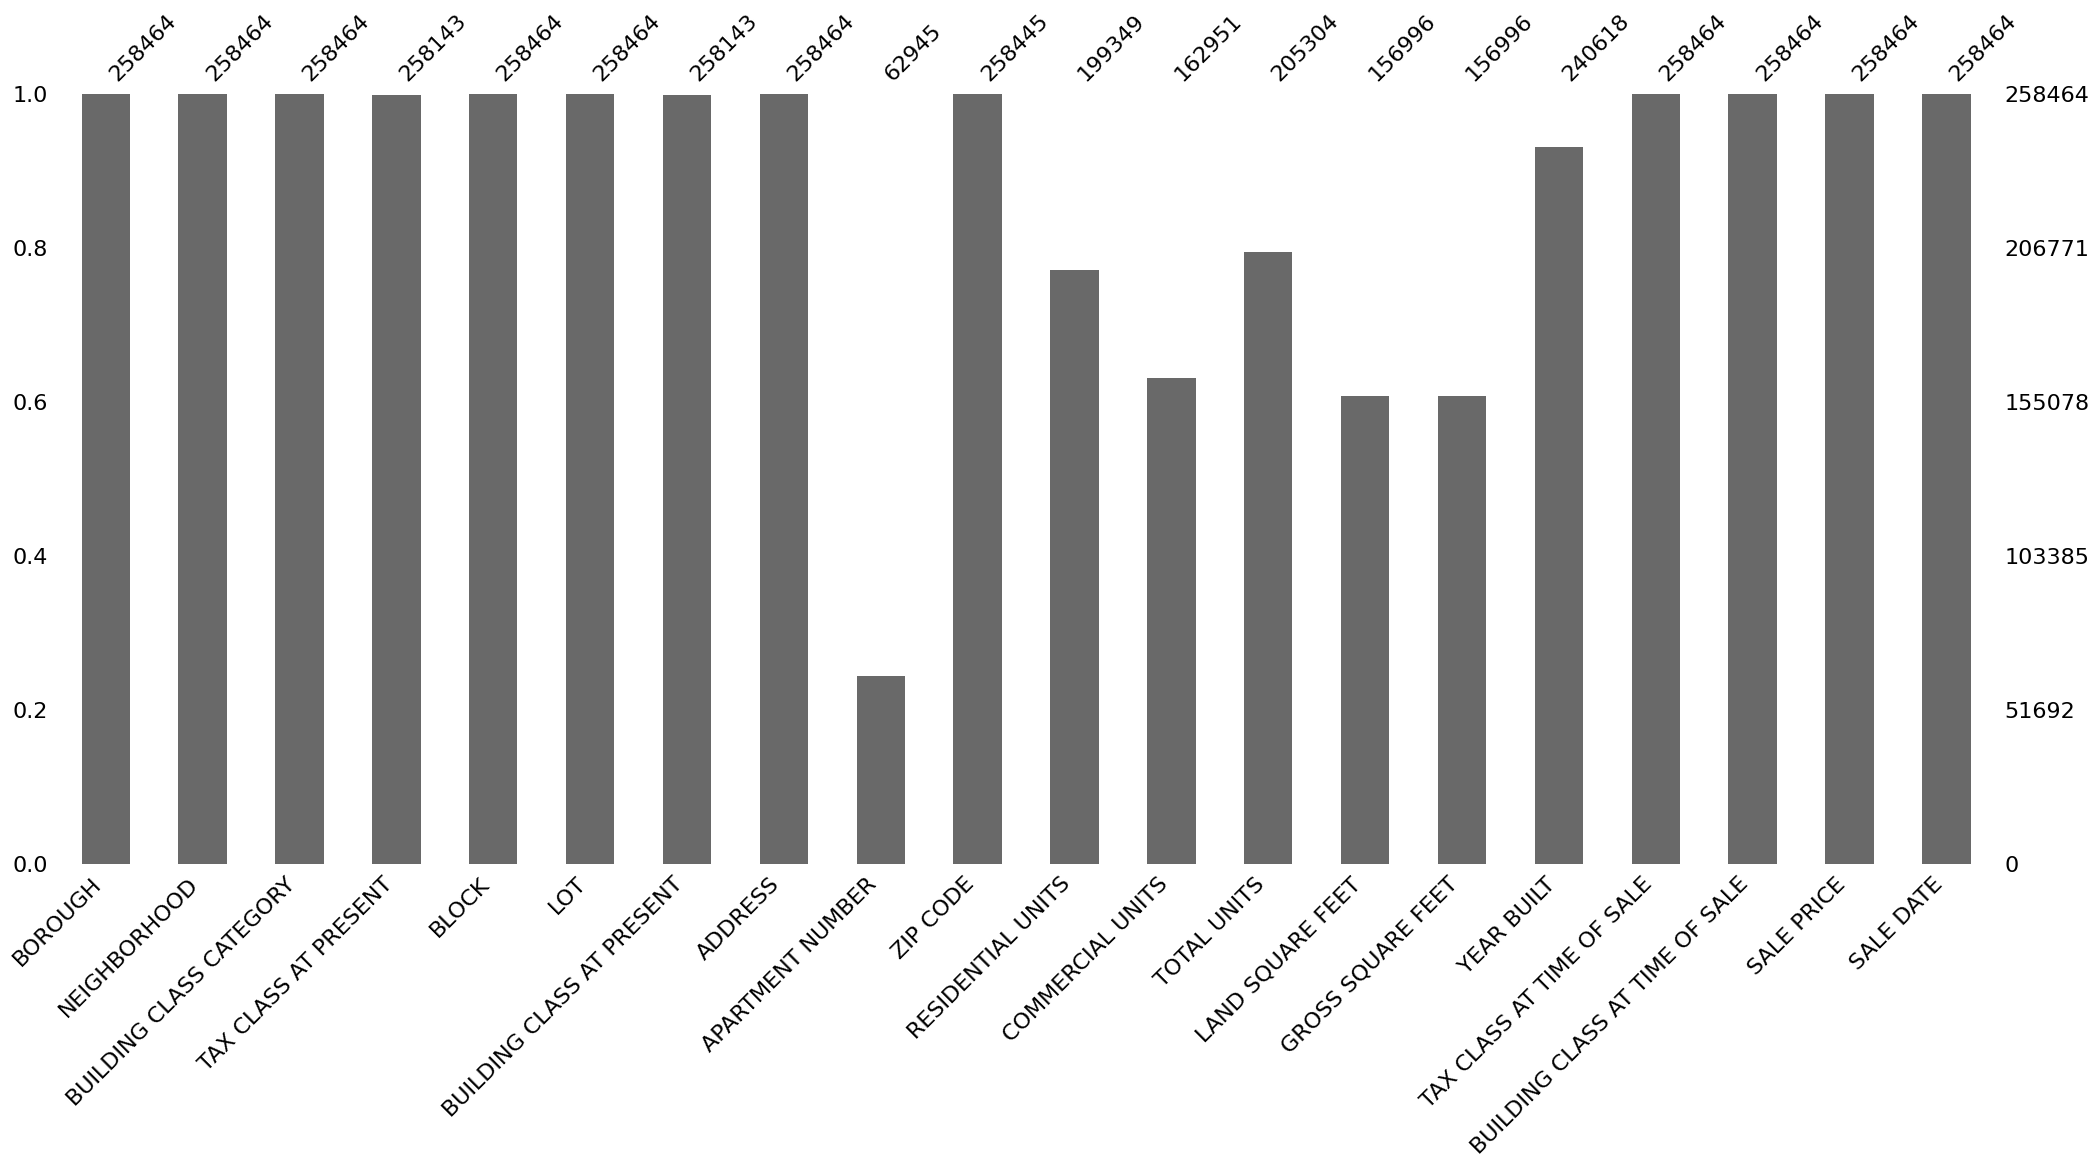

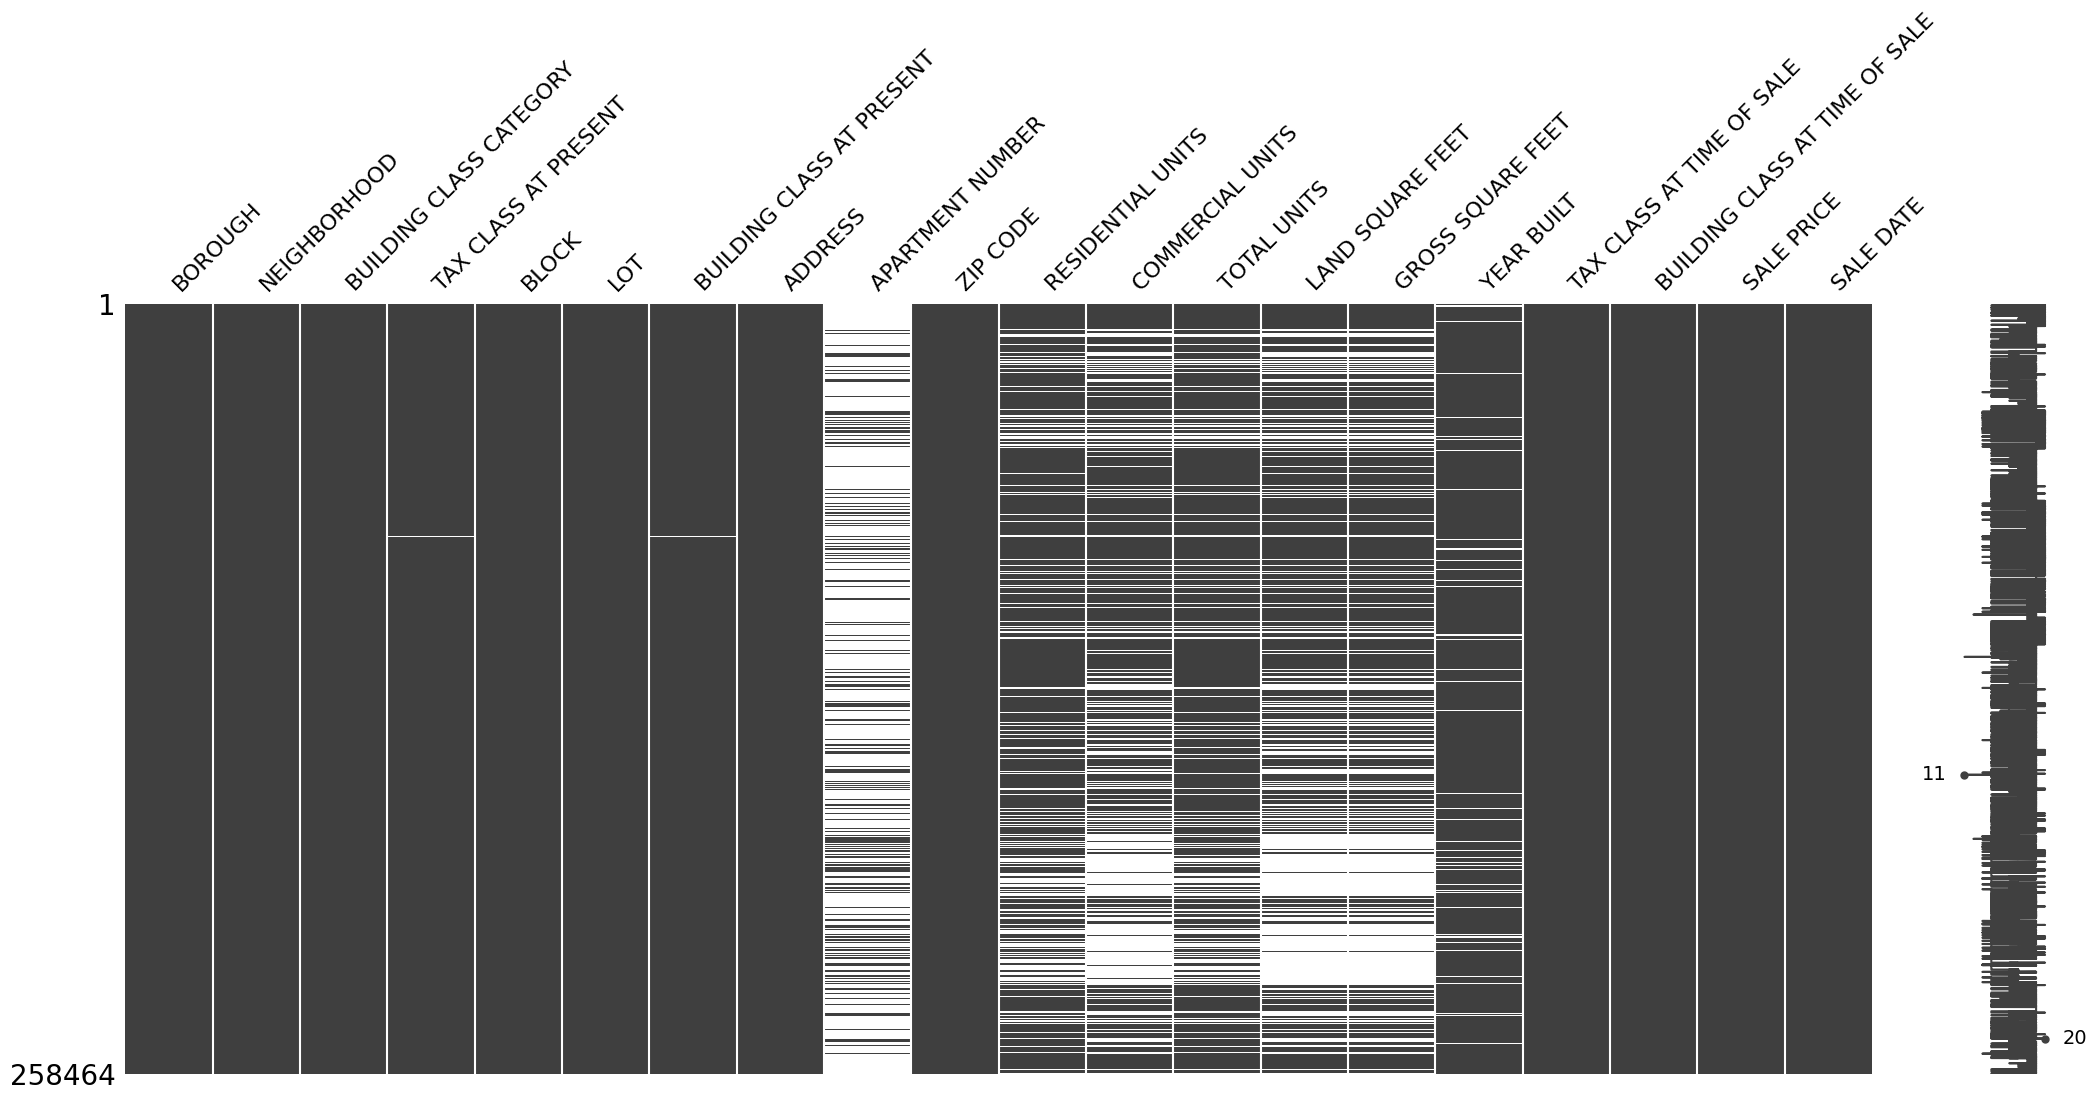

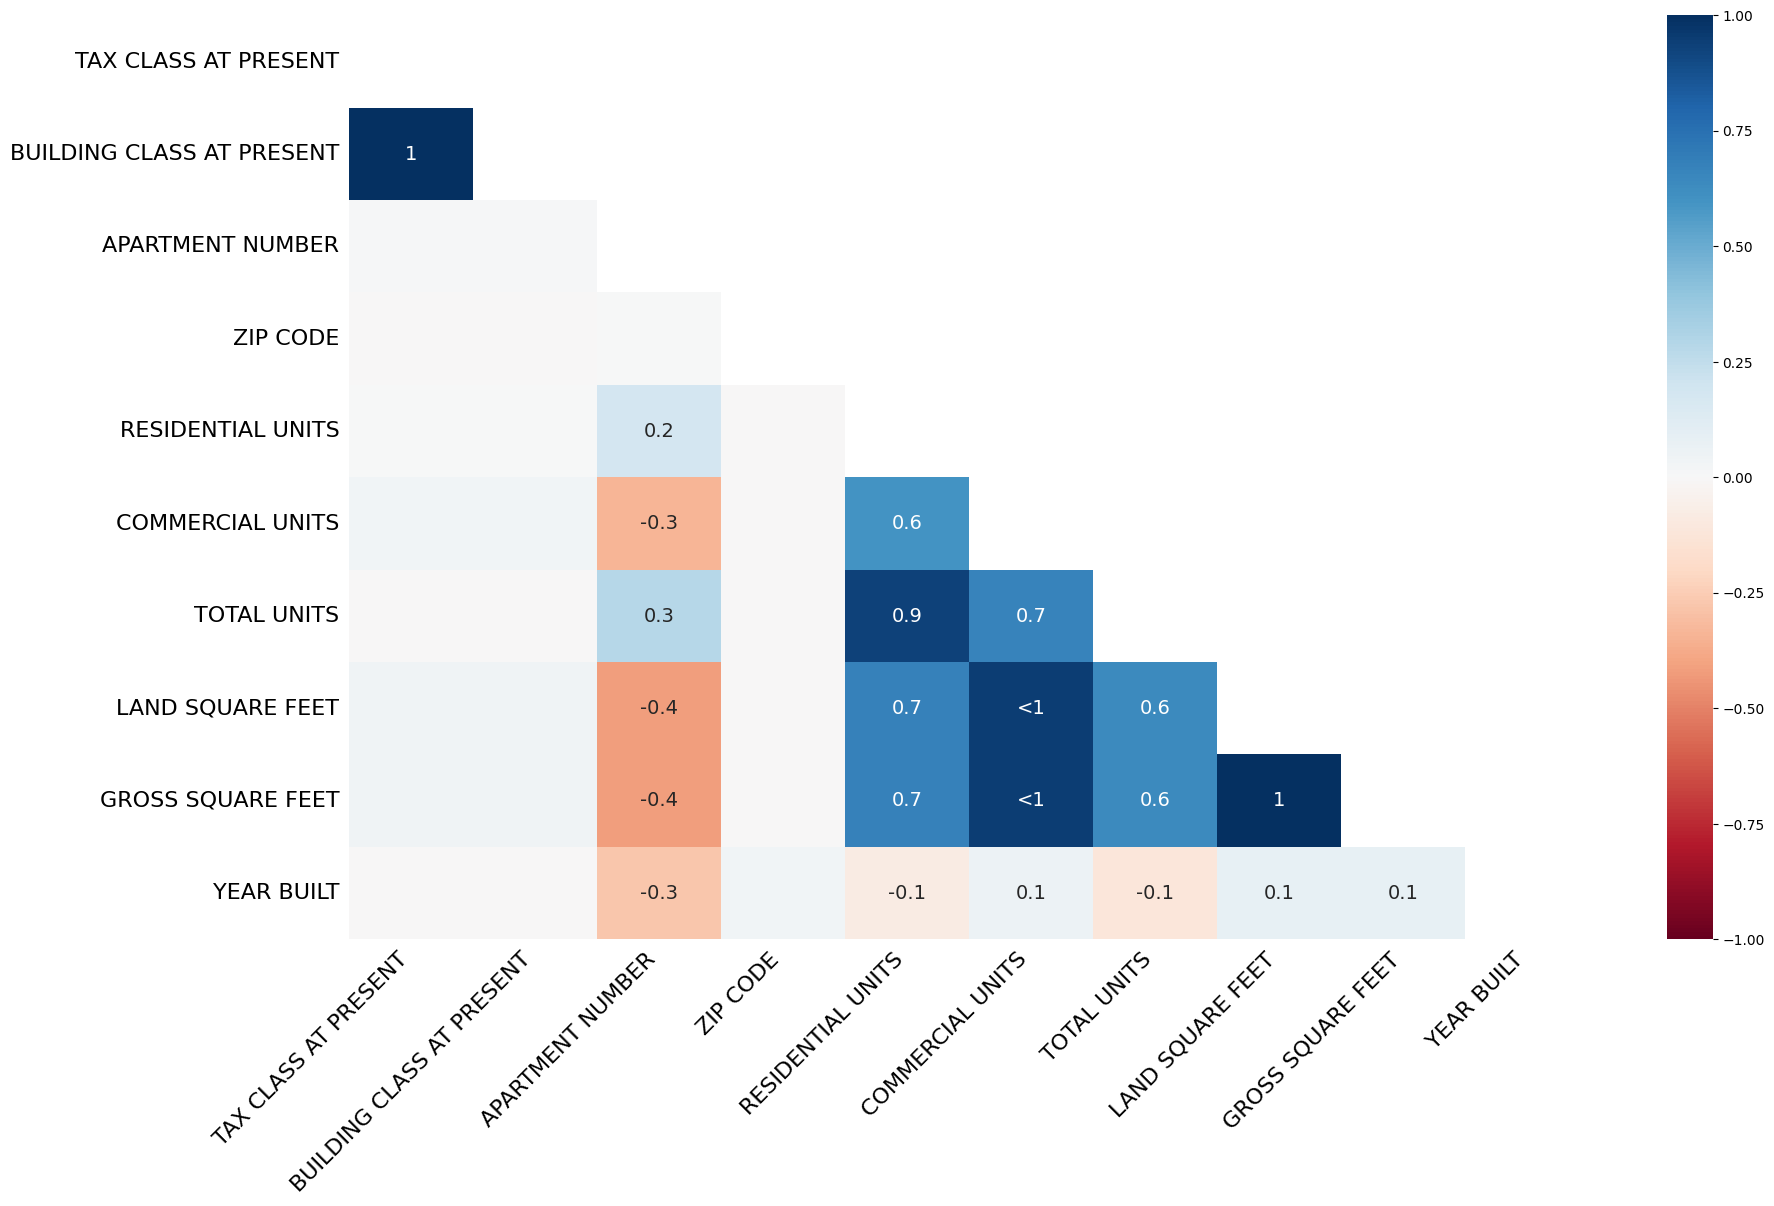

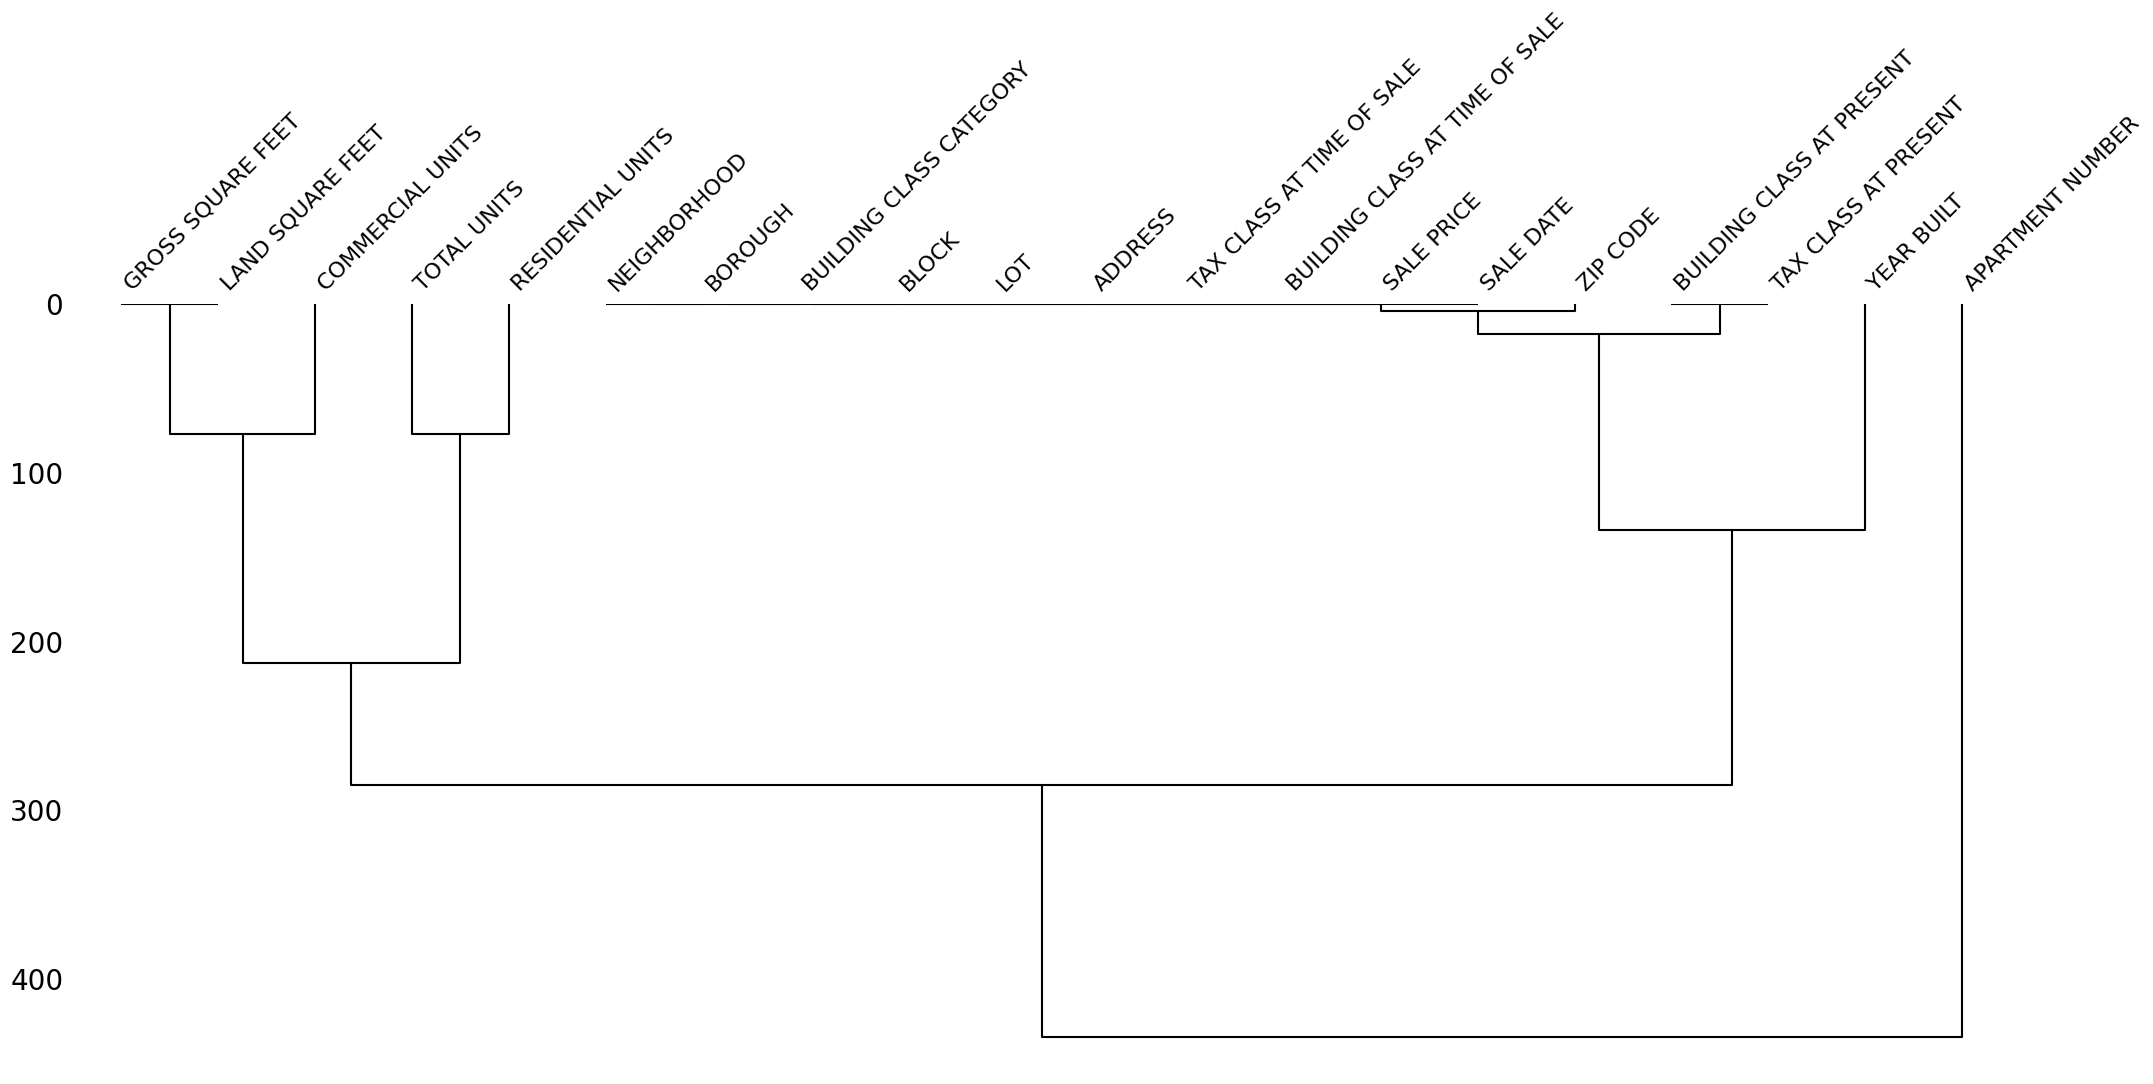

In [ ]:
# Plot bar chart for columns to illustrate the null values 
msno.bar(df)

# plot null values as a matrix
msno.matrix(df)

# plot heat map for the columns to observe the relation between null values
msno.heatmap(df)

# print dendogram for the missing value
msno.dendrogram(df)

In [ ]:
# display number of nulls in each column
df.isna().sum()

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 321
BLOCK                                  0
LOT                                    0
BUILDING CLASS AT PRESENT            321
ADDRESS                                0
APARTMENT NUMBER                  195519
ZIP CODE                              19
RESIDENTIAL UNITS                  59115
COMMERCIAL UNITS                   95513
TOTAL UNITS                        53160
LAND SQUARE FEET                  101468
GROSS SQUARE FEET                 101468
YEAR BUILT                         17846
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
dtype: int64

In [ ]:
# number of columns that contains null values 
sum(df.isna().any())

10

Summarize your answers to Q1 below, based on your analysis:

1- After using inf() and describe all is obvious that the datatype of the columns (features) vary among object, int64, and float64

2- the number of feature that has missing value are 10

3- the pattern of missing value is general pattern 

4- the mechanism of missing value for top 3 missied features:

the top 3 missed features are: APARTMENT NUMBER, GROSS SQUARE FEET, and LAND SQUARE FEET.

the mechanism for GROSS SQUARE FEET, and LAND SQUARE FEET is missing at random(MAR) because the have a relation in the missing value when one has null value the other has null value in the same record, while the mechanism for GROSS SQUARE FEET is missing compeletly at random (MCAR)


#Question 2: Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

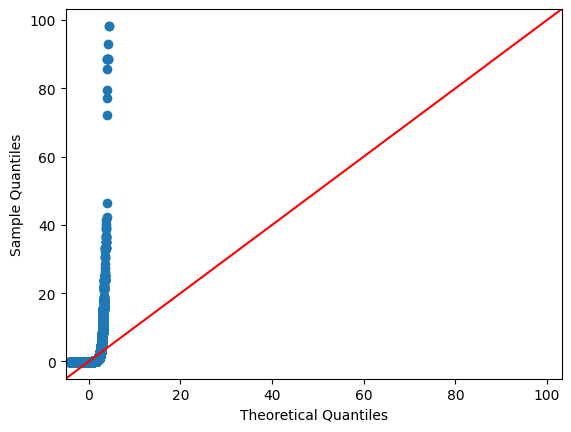

<ipython-input-65-d0494287fe9d>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




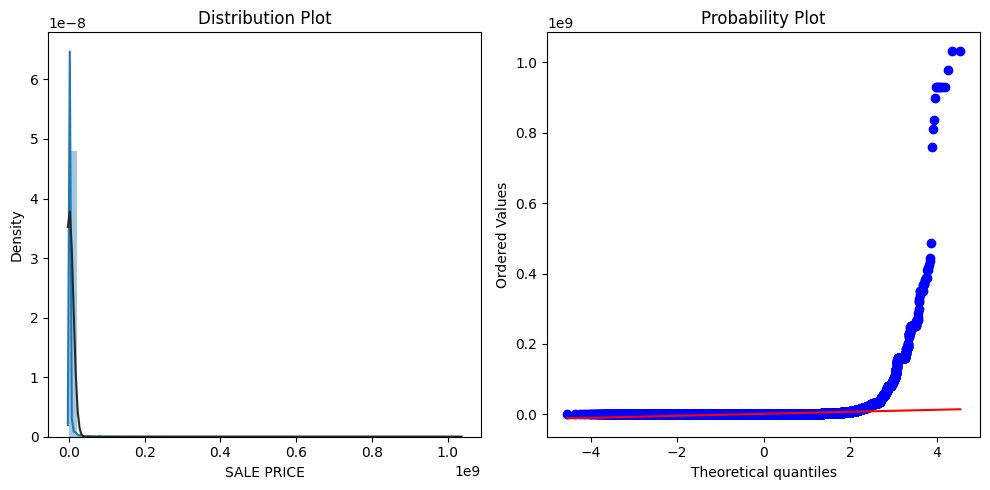

In [ ]:
# put your code for Q2 here, you can have multiple code blocks.

# start with graphical methods

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['SALE PRICE'], line='45', fit = True)
plt.show()

def normality_plot(X):

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Draw distribution plot with normal distribution fitted curve
    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    # Draw Quantile-Quantile plot 
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(df['SALE PRICE'])

In [ ]:
# let's try the statical tests

# Shapiro-wilk test
#p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
w, pvalue = stats.shapiro(df['SALE PRICE']) 
print("p = {:g}".format(pvalue))

# D’Agostino-Pearson’s K² test
k2, p = stats.normaltest(df['SALE PRICE'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")



p = 0
p = 0
The null hypothesis can be rejected


Summarize your answers to Q2 below, based on your analysis:

Shapiro and D’Agostino are a parametric test assume that the data comes from normal distributio 
null hypothesis (H0): "SALE PRICE" comes from a normal distribution
alterantive hypothesis (H1): "SALE PRICE" does not come from normal distribution

according to the graphical tests and statical tests the target column is not normaliy distributed:

in the grphical tests Q-Qplot and probability plot appear that the does not fit the line and distribution plot appears that the data does not have the normal distribution shape 

in the statical tests the null value which consider the data comes from normal distribution was rejected.

# Question 3: Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$



steps for hypothesis testing:

1- State the null hypothesis (H0) and alternative hypothesis (H1).

2- Choose the level of significance (alpha).

3- Select an appropriate test statistic.

4- Calculate the test statistic.

5-  Determine the p-value.

6- Compare the p-value to the level of significance.

7- Interpret the results.

**first point:**

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

**H0**: the real estate market did not change with COVID-19 pandemic

**H1**: the real estate market changed with COVID-19 pandemic

In [ ]:
# put your code for Q3 here, you can have multiple code blocks.

# convert the 'date' column to datetime format
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# specify sale price befor and after COVID-19 pandemic
befor_pandemic = df.loc[df['SALE DATE'] <= '2020-03-01']['SALE PRICE']
after_pandemic = df.loc[df['SALE DATE'] >  '2020-03-01']['SALE PRICE']

In [ ]:
# print dimension for the samples 
print(befor_pandemic.shape)
print(after_pandemic.shape)

(14012,)
(244452,)


In [ ]:
# select and perform two-sided test 
stats.mannwhitneyu(x=befor_pandemic, y=after_pandemic, alternative = 'two-sided')

MannwhitneyuResult(statistic=1583544692.0, pvalue=2.811364302522272e-52)

In [ ]:
tstatistic, pvalue = stats.mannwhitneyu(befor_pandemic,after_pandemic) 

print(pvalue)
# assign the level of significance (alpha) value to compare with p-value
alpha = .05

# take a decision based on the comparison between p-value and alph a
if pvalue < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected") 

2.811364302522272e-52
The null hypothesis can be rejected


according to the the hypothises test the null value was rejected which mean the market changed with covid-19 panademic

**second point:**

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

**H0:** properties in Manhattan do not sell at higher prices than properties elsewhere

**H1:** properties in Manhattan sell at higher prices than properties elsewhere

In [ ]:
df['BOROUGH'].unique()

#Manhattan ==> 1
#Bronx ==> 2
#Brooklyn ==> 3
#Queens ==> 4
#Staten Island	 ==> 5

array([5, 4, 1, 2, 3])

In [ ]:
# specify sale price for manhattan area and other areas
Manhhattan_area = df.loc[df['BOROUGH'] == 1]['SALE PRICE']
others = df.loc[df['BOROUGH'] != 1]['SALE PRICE']

In [ ]:
# take an equivalent sample for manhatten and the other areas and print sample dimension
man = Manhhattan_area.sample(2000)
print(man.shape)
other = others.sample(2000)
print(other.shape)


(2000,)
(2000,)


In [ ]:
# select and perform greater test 
stats.mannwhitneyu(x=man, y=other, alternative = 'greater')

MannwhitneyuResult(statistic=2715981.5, pvalue=3.1071822794943692e-87)

In [ ]:
tstatistic, pvalue = stats.mannwhitneyu(man,other) 

print(pvalue)

# assign the level of significance (alpha) value to compare with p-value
alpha = .05

# take a decision based on the comparison between p-value and alph a
if pvalue < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected") 

6.2143645589887385e-87
The null hypothesis can be rejected


according to hypothesis test the null value was rejected which means properties in Manhattan sell at higher prices than properties elsewher

# Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

In [ ]:
# take a look on features'data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [ ]:
# print data dimension
df.shape

(258464, 20)

In [ ]:
# print the precentage of the missing values in each column
df.isna().sum().sort_values()/len(df['BOROUGH'])

BOROUGH                           0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
TAX CLASS AT TIME OF SALE         0.000000
SALE PRICE                        0.000000
ADDRESS                           0.000000
SALE DATE                         0.000000
BLOCK                             0.000000
BUILDING CLASS CATEGORY           0.000000
NEIGHBORHOOD                      0.000000
LOT                               0.000000
ZIP CODE                          0.000074
BUILDING CLASS AT PRESENT         0.001242
TAX CLASS AT PRESENT              0.001242
YEAR BUILT                        0.069046
TOTAL UNITS                       0.205677
RESIDENTIAL UNITS                 0.228717
COMMERCIAL UNITS                  0.369541
LAND SQUARE FEET                  0.392581
GROSS SQUARE FEET                 0.392581
APARTMENT NUMBER                  0.756465
dtype: float64

In [ ]:
# drop APARTMENT NUMBER column because it has a 75% of missing value
# drop address number column because it has a string
# drop RESIDENTIAL UNITS column and COMMERCIAL UNITS column becuse their summation exist in the total units comlun
df = df.drop(['APARTMENT NUMBER','ADDRESS','RESIDENTIAL UNITS','COMMERCIAL UNITS'],axis=1)

# print dimension after dropping 4 column 
df.shape

(258464, 16)

In [ ]:
# print percentage of missing values in each column after dropping some columns
df.isna().sum().sort_values()/len(df['BOROUGH'])

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
BLOCK                             0.000000
LOT                               0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.000000
SALE DATE                         0.000000
ZIP CODE                          0.000074
TAX CLASS AT PRESENT              0.001242
BUILDING CLASS AT PRESENT         0.001242
YEAR BUILT                        0.069046
TOTAL UNITS                       0.205677
LAND SQUARE FEET                  0.392581
GROSS SQUARE FEET                 0.392581
dtype: float64

In [ ]:
# perform SimpleImputer on the categorical to fill missing values
imp_cat = SimpleImputer(strategy='most_frequent')
df['ZIP CODE'] = imp_cat.fit_transform(df[['ZIP CODE']])
df['TAX CLASS AT PRESENT'] = imp_cat.fit_transform(df[['TAX CLASS AT PRESENT']])
df['BUILDING CLASS AT PRESENT'] = imp_cat.fit_transform(df[['BUILDING CLASS AT PRESENT']])

In [ ]:
# convert sale date colum into date time format then into numbers 
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE DATE']=df['SALE DATE'].map(dt.datetime.toordinal)

In [ ]:
# Replace ant values with comma by nan
df['TOTAL UNITS'] = df['TOTAL UNITS'].str.replace('.,.', '', regex=True).replace('', 'nan')

In [ ]:
# perform KNNImputer on the numerical data 
imp_num = KNNImputer(n_neighbors=2)
df['LAND SQUARE FEET'] = imp_num.fit_transform(df[['LAND SQUARE FEET']])
df['GROSS SQUARE FEET'] = imp_num.fit_transform(df[['GROSS SQUARE FEET']])
df['SALE DATE'] = imp_num.fit_transform(df[['SALE DATE']])
df['TOTAL UNITS'] = imp_num.fit_transform(df[['TOTAL UNITS']])
df['YEAR BUILT'] = imp_num.fit_transform(df[['YEAR BUILT']])

In [ ]:
# convert some columns' data type into category 

# list of columns to convert to 'category' data type
cat_cols = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
            'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
            'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
            'ZIP CODE']

# perform loop on each column and convert to 'category' data type
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# check the the data type for the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   BOROUGH                         258464 non-null  category
 1   NEIGHBORHOOD                    258464 non-null  category
 2   BUILDING CLASS CATEGORY         258464 non-null  category
 3   TAX CLASS AT PRESENT            258464 non-null  category
 4   BLOCK                           258464 non-null  int64   
 5   LOT                             258464 non-null  int64   
 6   BUILDING CLASS AT PRESENT       258464 non-null  category
 7   ZIP CODE                        258464 non-null  category
 8   TOTAL UNITS                     258464 non-null  float64 
 9   LAND SQUARE FEET                258464 non-null  float64 
 10  GROSS SQUARE FEET               258464 non-null  float64 
 11  YEAR BUILT                      258464 non-null  float64 
 12  TA

In [ ]:
# encode the categorical data 

# list of categorical columns 
cat_cols = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
            'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
            'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
            'ZIP CODE']

# perform loop through each categorical column and encode
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# print the first five rows after encoding the data 
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,3,0,0,5391,9,5,65,1.0,3067.0,910.0,2002.0,0,5,0.0,737608.0
1,4,3,0,0,5404,46,1,65,1.0,8000.0,3660.0,1998.0,0,1,315000.0,737700.0
2,4,3,0,0,5407,6,1,65,1.0,6200.0,2580.0,1975.0,0,1,450000.0,737600.0
3,4,3,0,0,5425,31,1,65,1.0,2500.0,1222.0,1925.0,0,2,525000.0,737608.0
4,4,3,0,0,6205,17,5,65,1.0,1845.0,1854.0,1986.0,0,5,480000.0,737438.0


In [ ]:
# specify features to x and target to y
y = df[["SALE PRICE"]].values 
X= df.drop('SALE PRICE',axis=1).values

# print X and y dimension 
print(X.shape)
print(y.shape)

(258464, 15)
(258464, 1)


In [ ]:
# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

# print dimension for the data after splitting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(206771, 15)
(51693, 15)
(206771, 1)
(51693, 1)


In [ ]:
#select linearregression model and fit the model on the data 
model = LinearRegression()
model.fit(X_train, y_train)

#mke a prediction on test and train 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# print the metrics
print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)
print('Training RMSE:', train_rmse)
print('Testing RMSE:', test_rmse)
print('Training R^2 Score:', train_r2)
print('Testing R^2 Score:', test_r2)

Training MAE: 1842564.2348814297
Testing MAE: 1811684.0933382981
Training MSE: 105317540346980.02
Testing MSE: 101217291417645.44
Training RMSE: 10262433.451525034
Testing RMSE: 10060680.464940999
Training R^2 Score: 0.05893177623099044
Testing R^2 Score: 0.02030827049127204


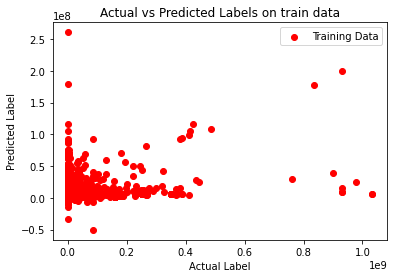

In [ ]:
# print actual and predicted labels on train data 
plt.scatter(y_train, y_train_pred, color='red', label='Training Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on train data')
plt.legend()
plt.show()

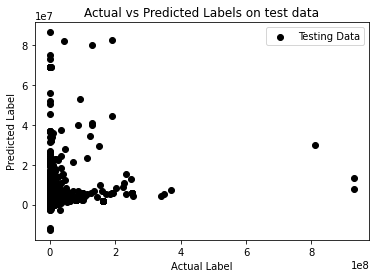

In [ ]:
# print actual and predicted labels on test data
plt.scatter(y_test, y_test_pred, color='black', label='Testing Data')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Actual vs Predicted Labels on test data')
plt.legend()
plt.show()

In [ ]:
# print the coefficients of the model
print('Coefficients:', model.coef_)

Coefficients: [[-2.24892313e+04 -4.01875802e+02  8.57432261e+04 -3.80848960e+05
   8.72959913e+00 -4.90584650e+01  1.61500964e+03 -8.62501574e+03
   1.92574900e+05 -7.46652076e+00  3.09719258e+01 -3.77807612e+03
   2.19186691e+06  1.65868480e+03  4.03759502e+02]]


**notes**

regarding the missing values: they were handled by univariate imputation and multivariate imputation respectively to avoid the impact of the missing values

the univariate imputation was simple imputer for the categorical data with strategy 'most frequent'

the multivariate imputation was KNN-imputer for numerical data with n_neighbours =2 

according to the above coefficients:
the higher 3 coefficients [2.19186691e+06 1.92574900e+05 8.57432261e+04] and their features respectivly [TAX CLASS AT TIME OF SALE, TOTAL UNITS, BUILDING CLASS CATEGORY]